# Descriptive statistics on classes and properties (ITO v0.92)

In [1]:
from owlready2 import *
from matplotlib.ticker import ScalarFormatter
import rdflib
import pandas as pd
%matplotlib inline

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
# Paths
ONTOLOGY = get_ontology('ITO-23-09-2021.owl')
#onto = get_ontology("https://github.com/OpenBioLink/ITO/raw/master/ITO.owl")
ONTOLOGY.load()
ITO = ONTOLOGY.get_namespace('https://ai-strategies.org/ontology')
EDAM = ONTOLOGY.get_namespace('http://edamontology.org')

In [3]:
graph = default_world.as_rdflib_graph()

namespaces ={ 'owl': rdflib.OWL,
              'rdfs': rdflib.RDFS,
              'edam': 'http://edamontology.org/',
              'ito': 'https://ai-strategies.org/ontology/'}

## Total number of papers covered by ITO

In [4]:
result = graph.query("""
SELECT (COUNT(?paper) as ?paper_count) WHERE {
    ?paper a edam:data_0971 .
}
""", initNs = namespaces)
df = pd.DataFrame.from_dict(result)
df

for i in result.bindings[0]:
    print(i)

paper_count


## Time span of publications covered by PWC

In [5]:
result = graph.query("""
SELECT ?paper ?date WHERE {
    ?paper a edam:data_0971 .
    ?paper <http://www.geneontology.org/formats/oboInOwl#date> ?date
}
ORDER BY ?date
""", initNs = namespaces)
df = pd.DataFrame.from_dict(result, orient='columns')
df.columns = [i for i in result.bindings[0]]
df.to_csv('data/time_span_of_publications_covered_by_PWC.csv', index=False)
df

#for i in result.bindings[0]:
#    print(type(i))

,paper,date
0,https://identifiers.org/ito:ITO_10000,2000-09-24
1,https://identifiers.org/ito:ITO_16777,2003-07-18
2,https://identifiers.org/ito:ITO_30858,2004-07-01
3,https://identifiers.org/ito:ITO_12116,2005-01-01
4,https://identifiers.org/ito:ITO_15836,2006-05-12
...,...,...
7668,https://identifiers.org/ito:ITO_20168,2021-07-13
7669,https://identifiers.org/ito:ITO_29574,2021-07-13
7670,https://identifiers.org/ito:ITO_34147,2021-07-13
7671,https://identifiers.org/ito:ITO_37637,2021-07-15


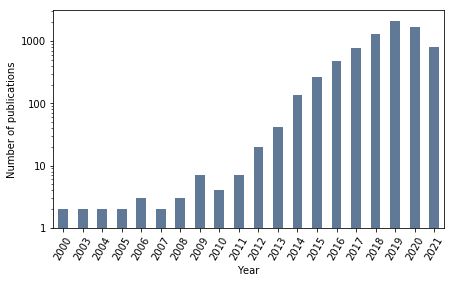

In [6]:
# Plot bar chart

time_span_of_publications_covered_by_PWC = pd.read_csv('data/time_span_of_publications_covered_by_PWC.csv')

# Convert 'date' column to datetime
time_span_of_publications_covered_by_PWC['date'] = pd.to_datetime(time_span_of_publications_covered_by_PWC['date'])

# Add extra column for year
time_span_of_publications_covered_by_PWC['year'] = time_span_of_publications_covered_by_PWC['date'].apply(lambda x: "%d" % (x.year))
time_span_of_publications_covered_by_PWC_grouped_by_year = time_span_of_publications_covered_by_PWC.groupby('year').size()


ax = time_span_of_publications_covered_by_PWC_grouped_by_year.plot.bar(rot=60, color=['#607996'], 
                                                                       figsize=(7,4), log=True)

ax.set_yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_label_text('Year')
ax.yaxis.set_label_text('Number of publications')

# Save figure
ax.figure.savefig('plots/time_span_of_publications.png', format='png')


## Total number of distinct benchmarks (datasets)

In [7]:
result = graph.query("""
SELECT (COUNT(?benchmark) as ?benchmark_count) WHERE {
    ?benchmark a <https://identifiers.org/ito:Benchmark_dataset> .
}
""", initNs = namespaces)
df = df.from_dict(result)
df

,0
0,3633


## Total number of benchmark results

In [8]:
result = graph.query("""
SELECT (COUNT(?benchmark) as ?benchmark_count) 
WHERE {
    ?benchmark rdf:type/rdfs:subClassOf* <https://identifiers.org/ito:Benchmarking> .
} """, initNs = namespaces)

df = pd.DataFrame.from_dict(result, orient='columns')
df.columns = [i for i in result.bindings[0]]
df

,benchmark_count
0,26495


## Number of benchmarks per high-level process


In [9]:
result = graph.query("""
SELECT ?high_level_process_label ?high_level_process
       (COUNT(?benchmark) AS ?benchmark_count)
WHERE {
    ?high_level_process rdfs:subClassOf <https://identifiers.org/ito:ITO_01625>;
                        rdfs:label ?high_level_process_label . 
    ?benchmark rdfs:subClassOf <https://identifiers.org/ito:Benchmarking> . 

    ?benchmark rdfs:subClassOf* ?high_level_process .
}
GROUP BY ?high_level_process
ORDER BY DESC(?benchmark_count)
""", initNs = namespaces)
number_of_benchmarks = pd.DataFrame.from_dict(result, orient='columns')
number_of_benchmarks.columns = [str(i) for i in result.bindings[0]]
number_of_benchmarks 

,high_level_process_label,high_level_process,benchmark_count
0,Benchmarking,https://identifiers.org/ito:Benchmarking,4590
1,Vision process,https://identifiers.org/ito:ITO_00101,2517
2,Natural language processing,https://identifiers.org/ito:ITO_00141,1127
3,Fundamental AI process,https://identifiers.org/ito:ITO_00115,694
4,Graph process,https://identifiers.org/ito:ITO_00137,258
5,Biomedical AI process,https://identifiers.org/ito:ITO_00126,224
6,Miscellaneous process,https://identifiers.org/ito:ITO_00113,222
7,Audio process,https://identifiers.org/ito:ITO_00145,207
8,Time series process,https://identifiers.org/ito:ITO_00131,175
9,Playing games,https://identifiers.org/ito:ITO_00873,171


In [10]:
#number_of_benchmarks = pd.concat([number_of_benchmarks.iloc[:,-1].astype(float), number_of_benchmarks.iloc[:,0]], axis=1)
#number_of_benchmarks = number_of_benchmarks.drop(index=[0,12])
#number_of_benchmarks 

## Number of benchmark results per high level process

In [11]:
result = graph.query("""
SELECT ?high_level_process_label ?high_level_process
       (COUNT(?benchmark) AS ?benchmark_count)
WHERE {
    ?high_level_process rdfs:subClassOf <https://identifiers.org/ito:ITO_01625>;
                        rdfs:label ?high_level_process_label . 
    ?benchmark rdf:type/rdfs:subClassOf* <https://identifiers.org/ito:Benchmarking> . 
    ?benchmark rdf:type/rdfs:subClassOf* ?high_level_process .
}
GROUP BY ?high_level_process
ORDER BY DESC(?benchmark_count)
""", initNs = namespaces)
number_of_benchmark_results = pd.DataFrame.from_dict(result, orient='columns')
number_of_benchmark_results.columns = [str(i) for i in result.bindings[0]]

In [12]:
#Fix column names
number_of_benchmarks.columns = ['high_level_process_label', 'high_level_process', 'Benchmarks']
number_of_benchmark_results.columns = ['high_level_process_label', 'high_level_process', 'Benchmark results']

number_of_benchmark_results.columns

comparison_df = pd.merge(number_of_benchmarks, number_of_benchmark_results, on=['high_level_process_label', 'high_level_process'])
comparison_df.drop(comparison_df.columns[1], axis=1, inplace=True)
comparison_df = comparison_df.sort_values(by='Benchmarks')
#Drop 'benchmarking' process
comparison_df = comparison_df[:-1]

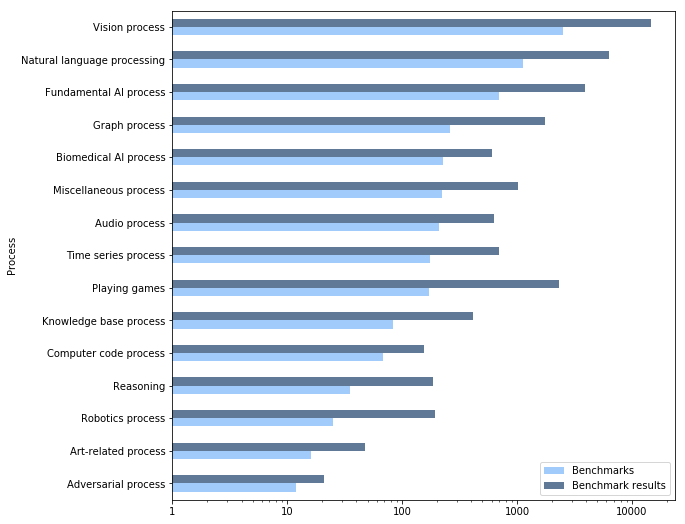

In [14]:
# Covert to float for plotting
comparison_df['Benchmarks'] = comparison_df['Benchmarks'].astype(float)
comparison_df['Benchmark results'] = comparison_df['Benchmark results'].astype(float)
comparison_df = comparison_df.set_index(comparison_df.iloc[:,0])
ax= comparison_df.plot.barh(figsize=(9,9), color=['#a1cbfb', '#607996'], log=True)


ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
#ax.xaxis.set_label_text('Year')
ax.yaxis.set_label_text('Process')
# Save figure
ax.figure.savefig('plots/comparison_benchmarks_and_results.png', format='png', bbox_inches='tight')